<a href="https://colab.research.google.com/github/electrojam/Curso-de-Decision-Trees-y-Random-Forest-con-Python-y-scikit-learn/blob/main/primer_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tu primer random forest con scikit-learn

In [1]:
#Importamos las librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Utilizaremos el dataset **Pima indians diabetes** de Kaggle: https://www.kaggle.com/datasets/kumargh/pimaindiansdiabetescsv

In [2]:
#Cargamos dataset a utilizar
df_diabetes = pd.read_csv('pima-indians-diabetes.csv', sep=',')
df_diabetes

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


## Exploración de datos

In [3]:
#Visualizacion del dataframe
df_diabetes.sample(10)  # visualizamos 10 registros aleatorios del df

,6,148,72,35,0,33.6,0.627,50,1
163,0,131,88,0,0,31.6,0.743,32,1
277,5,114,74,0,0,24.9,0.744,57,0
195,1,105,58,0,0,24.3,0.187,21,0
634,13,104,72,0,0,31.2,0.465,38,1
108,0,95,85,25,36,37.4,0.247,24,1
213,9,112,82,32,175,34.2,0.260,36,1
597,1,173,74,0,0,36.8,0.088,38,1
286,1,119,86,39,220,45.6,0.808,29,1
485,1,139,62,41,480,40.7,0.536,21,0
371,0,84,64,22,66,35.8,0.545,21,0


In [35]:
#Renombramos las columnas
df_diabetes.columns = ['1. Number of times pregnant', '2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test', '3. Diastolic blood pressure (mm Hg)', '4. Triceps skin fold thickness (mm)', '5. 2-Hour serum insulin (mu U/ml)', '6. Body mass index (weight in kg/(height in m)^2)', '7. Diabetes pedigree function', '8. Age (years)', '9. Class variable (0 or 1)']

In [36]:
#Verificacion de datos
df_diabetes.head()

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),9. Class variable (0 or 1)
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


En este conjunto de datos hay 8 características  de entrada y 1 característica de salida / destino / target.

El significado de los nombres de las características es el siguiente:

* Número de embarazos.
* Concentración de glucosa en plasma a 2 horas en una prueba oral de tolerancia a la glucosa.
* Presión arterial diastólica (mm Hg).
* Espesor del pliegue cutáneo del tríceps (mm).
* Insulina sérica de 2 horas (mu U / ml).
* Índice de masa corporal (peso en kg / (altura en m) ^ 2).
* Función del pedigrí de la diabetes.
* Edad (años).
* Variable de clase (0 o 1).

In [37]:
#Analizamos el shape del objeto
df_diabetes.shape

(767, 9)

In [38]:
#Visualizamos los tipos de datos
df_diabetes.dtypes

1. Number of times pregnant                                                      int64
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test      int64
3. Diastolic blood pressure (mm Hg)                                              int64
4. Triceps skin fold thickness (mm)                                              int64
5. 2-Hour serum insulin (mu U/ml)                                                int64
6. Body mass index (weight in kg/(height in m)^2)                              float64
7. Diabetes pedigree function                                                  float64
8. Age (years)                                                                   int64
9. Class variable (0 or 1)                                                       int64
dtype: object

## Entrenamiento de random forest con scikit-learn

In [39]:
#Separamos en X e y
X = df_diabetes.drop(['9. Class variable (0 or 1)'], axis=1)
y = df_diabetes['9. Class variable (0 or 1)']

In [40]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split

#30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=00000)

In [41]:
#Arbol de decision
from sklearn.ensemble import RandomForestClassifier

#Creacion del modelo
random_forest = RandomForestClassifier(n_estimators=10, random_state=00000)

In [42]:
#Entrenamiento
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [43]:
#Calculo de las predicciones en Train y Test
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

## Evaluación del modelo

In [44]:
#Calculo de metricas
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('El accuracy de train es: ', train_accuracy)
print('El accuracy de test es: ', test_accuracy)

El accuracy de train es:  0.9850746268656716
El accuracy de test es:  0.7445887445887446


In [82]:
#Verificamos el feature importances
feature_importances_df = pd.DataFrame(
    {'feature': list(X.columns), 'importance': random_forest.feature_importances_}).sort_values('importance', ascending=False)

# Mostrar
feature_importances_df


,feature,importance
1,2. Plasma glucose concentration a 2 hours in a...,0.205740
5,6. Body mass index (weight in kg/(height in m)^2),0.193899
7,8. Age (years),0.129633
6,7. Diabetes pedigree function,0.126973
0,1. Number of times pregnant,0.096289
2,3. Diastolic blood pressure (mm Hg),0.086302
3,4. Triceps skin fold thickness (mm),0.081293
4,5. 2-Hour serum insulin (mu U/ml),0.079870


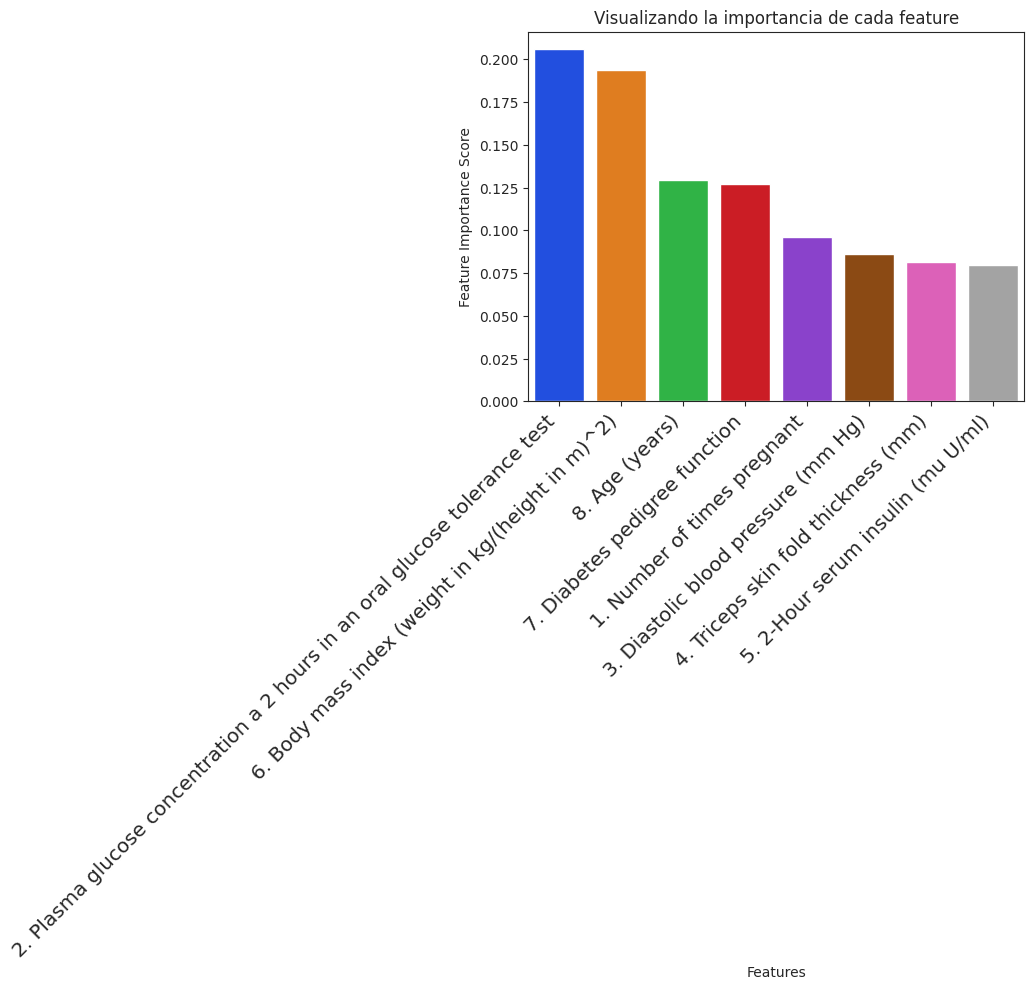

In [88]:
# Graficamos los feature_importances_df

sns.barplot(data=feature_importances_df, x='feature', y='importance', hue='feature')
plt.ylabel("Feature Importance Score")
plt.xlabel("Features")
plt.title('Visualizando la importancia de cada feature')
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large')
plt.show()

**Para pensar: ¿Qué pasa si agregamos más estimadores para nuestro modelo de random forest?**